## Data importing and visualization

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.rcParams["figure.figsize"] = (5.0, 4.0)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms

In [2]:
USE_GPU = True

dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 10

print('using device:', device)

using device: cuda


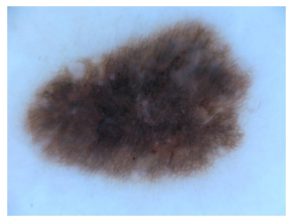

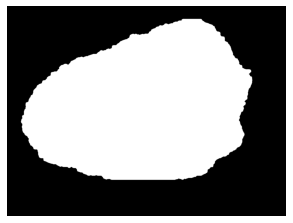

In [3]:
x_train_path = './data/training/ISIC-2017_Training_Data_2000'
y_train_path = './data/training/ISIC-2017_Training_Part1_GroundTruth/ISIC-2017_Training_Part1_GroundTruth'

# Get the list of image files
x_train_files = os.listdir(x_train_path)
y_train_files = os.listdir(y_train_path)

# Sort the file lists
x_train_files.sort()
y_train_files.sort()

# Get the path of the first image
first_x_train_image_path = os.path.join(x_train_path, x_train_files[0])

# Open the first image
first_x_train_image = Image.open(first_x_train_image_path)

# Display the first image using matplotlib
plt.imshow(first_x_train_image)
plt.axis('off')  # Turn off axis labels
plt.show()

# Get the path of the first image
first_y_train_image_path = os.path.join(y_train_path, y_train_files[0])

# Open the first image
first_y_train_image = Image.open(first_y_train_image_path)

# Display the first image using matplotlib
plt.imshow(first_y_train_image, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

In [4]:
# check shape
x_first_image = np.array(first_x_train_image)
y_first_image = np.array(first_y_train_image)
print("x shape:", x_first_image.shape)
print("y shape:", y_first_image.shape)

x shape: (767, 1022, 3)
y shape: (767, 1022)


In [5]:
x_val_path = './data/validation/ISIC-2017_Validation_Data/ISIC-2017_Validation_Data'
y_val_path = './data/validation/ISIC-2017_Validation_Part1_GroundTruth/ISIC-2017_Validation_Part1_GroundTruth'

# Get the list of image files
x_val_files = os.listdir(x_val_path)
y_val_files = os.listdir(y_val_path)

# Sort the file lists
x_val_files.sort()
y_val_files.sort()

In [6]:
x_test_path = './data/testing/test_x'
y_test_path = './data/testing/test_y'

# Get the list of image files
x_test_files = os.listdir(x_test_path)
y_test_files = os.listdir(y_test_path)

# Sort the file lists
x_test_files.sort()
y_test_files.sort()

## Data compression (run this only once)

In [6]:
# Define the target size
target_size = 64

# Define paths to store the resized images
resized_x_train_path = './data/training/resized_x_train'
resized_y_train_path = './data/training/resized_y_train'

# Create directories to store resized images if they don't exist
os.makedirs(resized_x_train_path, exist_ok=True)
os.makedirs(resized_y_train_path, exist_ok=True)


# Iterate through the file lists and create data pairs
for x_file, y_file in zip(x_train_files, y_train_files):
    x_file_path = os.path.join(x_train_path, x_file)
    y_file_path = os.path.join(y_train_path, y_file)

    # Check if the resized images already exist
    resized_x_file_path = os.path.join(resized_x_train_path, x_file)
    resized_y_file_path = os.path.join(resized_y_train_path, y_file)

    if os.path.exists(resized_x_file_path) and os.path.exists(resized_y_file_path):
        # Load the resized images from disk
        x_image_resized = Image.open(resized_x_file_path)
        y_image_resized = Image.open(resized_y_file_path)
    else:
        # Load the input data
        x_image = Image.open(x_file_path)
        x_image_resized = x_image.resize((target_size, target_size))

        # Load the corresponding label
        y_image = Image.open(y_file_path)
        y_image_resized = y_image.resize((target_size, target_size))

        # Save the resized images to disk for future use
        x_image_resized.save(resized_x_file_path)
        y_image_resized.save(resized_y_file_path)


In [62]:
# Define the target size
target_size = 64

# Define paths to store the resized images
resized_x_val_path = './data/validation/resized_x_val'
resized_y_val_path = './data/validation/resized_y_val'

# Create directories to store resized images if they don't exist
os.makedirs(resized_x_val_path, exist_ok=True)
os.makedirs(resized_y_val_path, exist_ok=True)


# Iterate through the file lists and create data pairs
for x_file, y_file in zip(x_val_files, y_val_files):
    x_file_path = os.path.join(x_val_path, x_file)
    y_file_path = os.path.join(y_val_path, y_file)

    # Check if the resized images already exist
    resized_x_file_path = os.path.join(resized_x_val_path, x_file)
    resized_y_file_path = os.path.join(resized_y_val_path, y_file)

    if os.path.exists(resized_x_file_path) and os.path.exists(resized_y_file_path):
        # Load the resized images from disk
        x_image_resized = Image.open(resized_x_file_path)
        y_image_resized = Image.open(resized_y_file_path)
    else:
        # Load the input data
        x_image = Image.open(x_file_path)
        x_image_resized = x_image.resize((target_size, target_size))

        # Load the corresponding label
        y_image = Image.open(y_file_path)
        y_image_resized = y_image.resize((target_size, target_size))

        # Save the resized images to disk for future use
        x_image_resized.save(resized_x_file_path)
        y_image_resized.save(resized_y_file_path)


In [69]:
# Define the target size
target_size = 64

# Define paths to store the resized images
resized_x_test_path = './data/testing/resized_x_test'
resized_y_test_path = './data/testing/resized_y_test'

# Create directories to store resized images if they don't exist
os.makedirs(resized_x_test_path, exist_ok=True)
os.makedirs(resized_y_test_path, exist_ok=True)


# Iterate through the file lists and create data pairs
for x_file, y_file in zip(x_test_files, y_test_files):
    x_file_path = os.path.join(x_test_path, x_file)
    y_file_path = os.path.join(y_test_path, y_file)

    # Check if the resized images already exist
    resized_x_file_path = os.path.join(resized_x_test_path, x_file)
    resized_y_file_path = os.path.join(resized_y_test_path, y_file)

    if os.path.exists(resized_x_file_path) and os.path.exists(resized_y_file_path):
        # Load the resized images from disk
        x_image_resized = Image.open(resized_x_file_path)
        y_image_resized = Image.open(resized_y_file_path)
    else:
        # Load the input data
        x_image = Image.open(x_file_path)
        x_image_resized = x_image.resize((target_size, target_size))

        # Load the corresponding label
        y_image = Image.open(y_file_path)
        y_image_resized = y_image.resize((target_size, target_size))

        # Save the resized images to disk for future use
        x_image_resized.save(resized_x_file_path)
        y_image_resized.save(resized_y_file_path)


## Data wrapping

In [8]:
x_train_path = './data/training/resized_x_train'
y_train_path = './data/training/resized_y_train'
# Get the list of image files
x_train_files = os.listdir(x_train_path)
y_train_files = os.listdir(y_train_path)
# Sort the file lists
x_train_files.sort()
y_train_files.sort()

# Create a list to store the data pairs
data_pairs = []

for x_file, y_file in zip(x_train_files, y_train_files):
    x_file_path = os.path.join(x_train_path, x_file)
    y_file_path = os.path.join(y_train_path, y_file)

    # Load and preprocess the input data
    x_image = Image.open(x_file_path)
    x_data = np.array(x_image) / 255.0

    # Load and preprocess the corresponding label
    y_image = Image.open(y_file_path)
    y_data = np.array(y_image) / 255.0

    # Create a data pair and append it to the list
    data_pair = (x_data, y_data)
    data_pairs.append(data_pair)

In [9]:
x_val_path = './data/validation/resized_x_val'
y_val_path = './data/validation/resized_y_val'
# Get the list of image files
x_val_files = os.listdir(x_val_path)
y_val_files = os.listdir(y_val_path)
# Sort the file lists
x_val_files.sort()
y_val_files.sort()

# Create a list to store the data pairs
data_pairs_val = []

for x_file, y_file in zip(x_val_files, y_val_files):
    x_file_path = os.path.join(x_val_path, x_file)
    y_file_path = os.path.join(y_val_path, y_file)

    # Load and preprocess the input data
    x_image = Image.open(x_file_path)
    x_data = np.array(x_image) / 255.0

    # Load and preprocess the corresponding label
    y_image = Image.open(y_file_path)
    y_data = np.array(y_image) / 255.0

    # Create a data pair and append it to the list
    data_pair_val = (x_data, y_data)
    data_pairs_val.append(data_pair_val)

In [7]:
x_test_path = './data/testing/resized_x_test'
y_test_path = './data/testing/resized_y_test'

## Prepare DataLoader

In [10]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data_pairs):
        self.data_pairs = data_pairs

    def __len__(self):
        return len(self.data_pairs)

    def __getitem__(self, idx):
        x_data, y_data = self.data_pairs[idx]
        x_data = np.transpose(x_data, (2, 0, 1)) 
        return torch.from_numpy(x_data).float(), torch.from_numpy(y_data).float().unsqueeze(0)
    
# Create custom datasets
dataset_train = CustomDataset(data_pairs)

# Create data loaders
loader_train = DataLoader(dataset_train, batch_size=40, shuffle=True)

# Create custom datasets
dataset_val = CustomDataset(data_pairs_val)

# Create data loaders
loader_val = DataLoader(dataset_val, batch_size=1, shuffle=True)

## Define IoU metric

In [11]:
def iou_score(output, target):
    smooth = 1e-6

    if torch.is_tensor(output):
        output = torch.sigmoid(output).data.cpu().numpy()
    if torch.is_tensor(target):
        target = target.data.cpu().numpy()

    output_ = output > 0.5
    target_ = target > 0.5
    intersection = (output_ & target_).sum()
    union = (output_ | target_).sum()

    return (intersection + smooth) / (union + smooth)

## Model : Customized U-net

In [55]:
import torch
import torch.nn as nn

def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.BatchNorm2d(out_channels),  # Add batch normalization after the first conv layer
        nn.ReLU(inplace=True),
        nn.Dropout(0.1),  # Add dropout after the first activation function
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.BatchNorm2d(out_channels),  # Add batch normalization after the second conv layer
        nn.ReLU(inplace=True)
    )

class UNet(nn.Module):

    def __init__(self, n_class):
        super().__init__()
                
        self.dconv_down1 = double_conv(3, 64)
        self.dconv_down2 = double_conv(64, 128)
        self.dconv_down3 = double_conv(128, 256)
        
        self.maxpool = nn.MaxPool2d(2)
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)        
        
        self.dconv_up2 = double_conv(256 + 128, 128)
        self.dconv_up1 = double_conv(128 + 64, 64)
        
        self.conv_last = nn.Conv2d(64, n_class, 1)
        
        
    def forward(self, x):
        conv1 = self.dconv_down1(x)
        x = self.maxpool(conv1)

        conv2 = self.dconv_down2(x)
        x = self.maxpool(conv2)
        
        x = self.dconv_down3(x)
        
        x = self.upsample(x)        
        x = torch.cat([x, conv2], dim=1)
        
        x = self.dconv_up2(x)
        x = self.upsample(x)        
        x = torch.cat([x, conv1], dim=1)       

        x = self.dconv_up1(x)
        
        out = self.conv_last(x)
        return out

In [58]:
model = UNet(n_class=1).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
num_epochs = 20

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_val_loss = 0
    epoch_train_iou = 0
    epoch_val_iou = 0
    
    model.train()
    for i, (inputs, labels) in enumerate(loader_train):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute IoU
        iou = iou_score(outputs, labels)
        epoch_train_iou += iou

        # Accumulate loss
        epoch_loss += loss.item()
        # Print log
        if i % print_every == 0:
            print ('Epoch {}/{}, Iteration {}, Loss: {:.4f}, IoU: {:.4f}'
                   .format(epoch+1, num_epochs, i, loss.item(), iou))
    avg_loss = epoch_loss / len(loader_train)
    avg_train_iou = epoch_train_iou / len(loader_train)
    print('Epoch {}/{}, Average Loss: {:.4f}, Average IoU: {:.4f}'
          .format(epoch+1, num_epochs, avg_loss, avg_train_iou))
    train_losses.append(avg_loss)
    
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for inputs_val, labels_val in loader_val:
            inputs_val = inputs_val.to(device)
            labels_val = labels_val.to(device)

            # Forward pass for validation set
            outputs_val = model(inputs_val)
            val_loss = criterion(outputs_val, labels_val)
            epoch_val_loss += val_loss.item()

            # Compute IoU for validation set
            iou_val = iou_score(outputs_val, labels_val)
            epoch_val_iou += iou_val

        # Compute average validation loss and IoU
        avg_val_loss = epoch_val_loss / len(loader_val)
        avg_val_iou = epoch_val_iou / len(loader_val)
        print('Epoch {}/{}, Average Loss (Validation): {:.4f}, Average IoU (Validation): {:.4f}'
              .format(epoch + 1, num_epochs, avg_val_loss, avg_val_iou))
              
        val_losses.append(avg_val_loss)  # Store average validation loss

Epoch 1/20, Iteration 0, Loss: 0.8152, IoU: 0.1711
Epoch 1/20, Iteration 10, Loss: 0.5191, IoU: 0.5717
Epoch 1/20, Iteration 20, Loss: 0.4213, IoU: 0.6470
Epoch 1/20, Iteration 30, Loss: 0.4049, IoU: 0.6446
Epoch 1/20, Iteration 40, Loss: 0.3962, IoU: 0.5945
Epoch 1/20, Average Loss: 0.4566, Average IoU: 0.5701
Epoch 1/20, Average Loss (Validation): 0.3849, Average IoU (Validation): 0.5018
Epoch 2/20, Iteration 0, Loss: 0.3422, IoU: 0.7277
Epoch 2/20, Iteration 10, Loss: 0.3405, IoU: 0.7075
Epoch 2/20, Iteration 20, Loss: 0.3305, IoU: 0.7051
Epoch 2/20, Iteration 30, Loss: 0.3175, IoU: 0.7265
Epoch 2/20, Iteration 40, Loss: 0.3485, IoU: 0.6428
Epoch 2/20, Average Loss: 0.3322, Average IoU: 0.6987
Epoch 2/20, Average Loss (Validation): 0.3419, Average IoU (Validation): 0.5564
Epoch 3/20, Iteration 0, Loss: 0.2938, IoU: 0.7713
Epoch 3/20, Iteration 10, Loss: 0.2846, IoU: 0.7750
Epoch 3/20, Iteration 20, Loss: 0.2980, IoU: 0.7307
Epoch 3/20, Iteration 30, Loss: 0.2816, IoU: 0.7747
Epoch 3

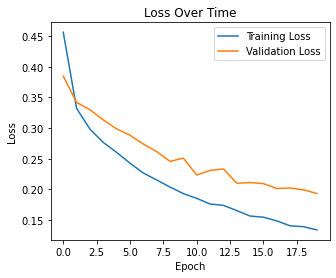

In [59]:
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()

## Test 5 random pictures and visualize the segmentation (obtained from ISIC)

In [75]:
def get_prediction(x_test_image, y_test_image):
    test_iou = 0
    x_data = np.array(x_test_image) / 255.0
    x_data = np.transpose(x_data, (2, 0, 1))  # change from (H, W, C) to (C, H, W)
    x_data = torch.from_numpy(x_data).float()  # Convert to tensor
    x_data = x_data.unsqueeze(0)  # Add batch dimension
    x_data = x_data.to(device)  # Send to device

    # Get model prediction
    with torch.no_grad():
        model.eval()  # Set model to eval mode
        output = model(x_data)
        y_data = np.array(y_test_image) / 255.0
        test_iou = iou_score(output, y_data)
        output = torch.sigmoid(output)  # Apply sigmoid to get probabilities
        output = output.squeeze(0)  # Remove batch dimension
        output = output.cpu().numpy()  # Convert to numpy array

    # Threshold the probabilities to get binary mask
    output = output > 0.5
    
    # Convert boolean mask to uint8 and scale it to 255
    output = output.astype(np.uint8) * 255
    output = output.squeeze(0)
    return output, test_iou

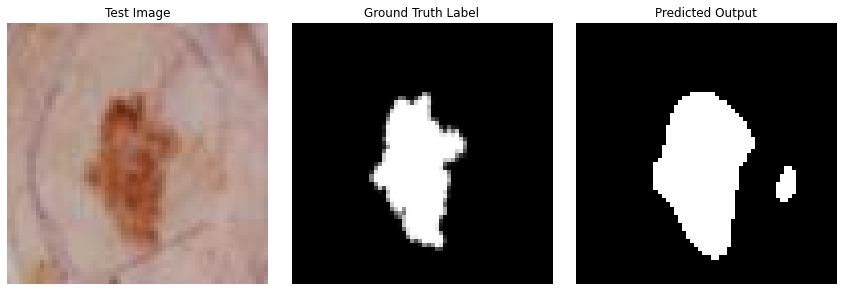

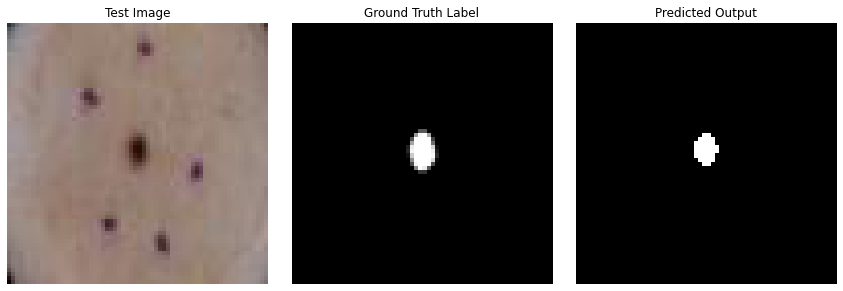

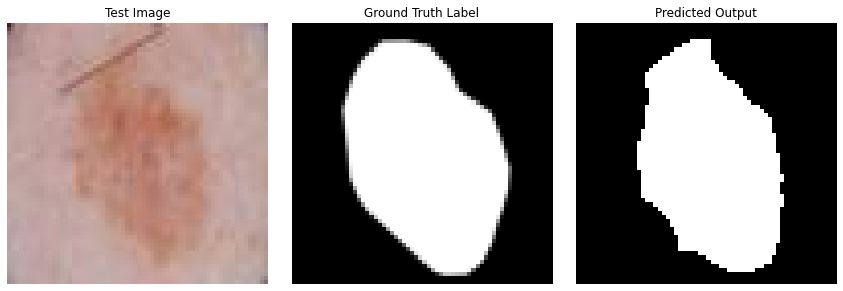

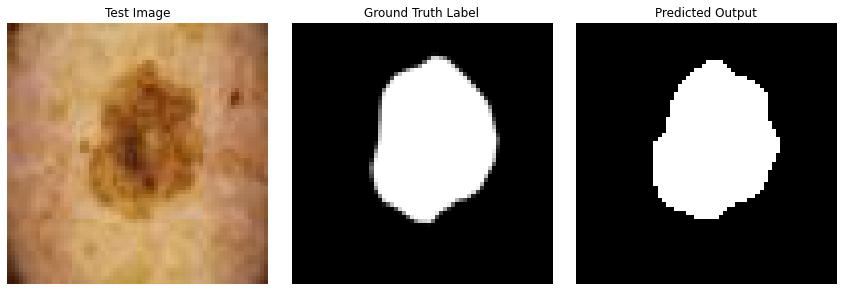

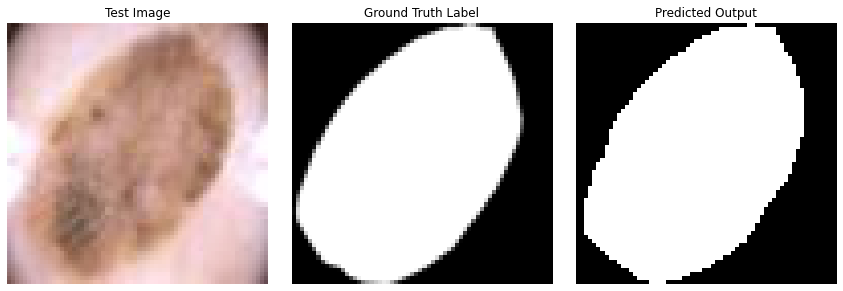

In [76]:
test_iou = 0
for x_file, y_file in zip(x_test_files, y_test_files):
    x_test_image_path = os.path.join(x_test_path, x_file)
    y_test_image_path = os.path.join(y_test_path, y_file)
    
    x_test_image = Image.open(x_test_image_path)
    y_test_image = Image.open(y_test_image_path)
    y_pred_image, curr_iou = get_prediction(x_test_image, y_test_image)
    test_iou += curr_iou
    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Plot the test image in the first subplot
    axes[0].imshow(x_test_image)
    axes[0].axis("off")
    axes[0].set_title("Test Image")

    # Plot the ground truth label in the second subplot
    axes[1].imshow(y_test_image, cmap="gray")
    axes[1].axis("off")
    axes[1].set_title("Ground Truth Label")

    # Plot the predicted output in the third subplot
    axes[2].imshow(y_pred_image, cmap="gray")  
    axes[2].axis("off")
    axes[2].set_title("Predicted Output")

    # Adjust spacing between subplots
    plt.tight_layout()
    

In [70]:
test_iou = test_iou / len(x_test_files)
print(test_iou)

0.8442283725507215
